# Illegal Mines Correlation

We are using a smaller data set that only contains few relevant features: income, lighting, deforestation, health and distance to the nearest large-scale mine.
Also the data in the above features is aggregated by year and latitude/longitude.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn
%matplotlib inline

In [2]:
# Dataset location
maindb = "short.csv"

# Read in a CSV file and store the contents in a dataframe (df)
df = pd.read_csv(maindb, low_memory=False, sep=',')
df.head()


,year,x,y,expenditure,income,ill_or_injured,malaria,forestloss,nightlights,distance_nearestlargemine
0,98.0,-3.05622,6.86144,679.86713,344.251040,0.295238,0.627282,0.0,0.00000,76552.820
1,98.0,-2.94462,6.35241,545.13544,514.467100,0.297297,0.628550,0.0,0.34153,69400.570
2,98.0,-2.85447,7.74937,709.71167,511.725740,0.265823,0.603990,0.0,0.00000,47839.813
3,98.0,-2.81880,10.72420,246.44479,85.705086,0.173913,0.553067,0.0,0.00000,245310.780
4,98.0,-2.81525,6.88833,1034.02030,826.393370,0.125000,0.620716,0.0,0.00000,49765.992


In [3]:
df.shape

(1593, 10)

,year,x,y,expenditure,income,ill_or_injured,malaria,forestloss,nightlights,distance_nearestlargemine
year,1.000000,-0.041613,0.140556,0.282040,0.210935,-0.279912,-0.345842,0.268879,-0.012088,0.122306
x,-0.041613,1.000000,-0.044612,0.044417,-0.032909,0.028370,-0.405654,-0.140034,0.130309,0.234926
y,0.140556,-0.044612,1.000000,-0.299556,-0.121485,-0.140273,0.349652,-0.301155,-0.314759,0.877439
expenditure,0.282040,0.044417,-0.299556,1.000000,0.556490,-0.058995,-0.496576,0.254737,0.526546,-0.238783
income,0.210935,-0.032909,-0.121485,0.556490,1.000000,-0.102473,-0.273329,0.221765,0.248368,-0.119854
ill_or_injured,-0.279912,0.028370,-0.140273,-0.058995,-0.102473,1.000000,0.148217,-0.096269,-0.105714,-0.135924
malaria,-0.345842,-0.405654,0.349652,-0.496576,-0.273329,0.148217,1.000000,-0.130625,-0.583006,0.246476
forestloss,0.268879,-0.140034,-0.301155,0.254737,0.221765,-0.096269,-0.130625,1.000000,0.039231,-0.311557
nightlights,-0.012088,0.130309,-0.314759,0.526546,0.248368,-0.105714,-0.583006,0.039231,1.000000,-0.218054
distance_nearestlargemine,0.122306,0.234926,0.877439,-0.238783,-0.119854,-0.135924,0.246476,-0.311557,-0.218054,1.000000


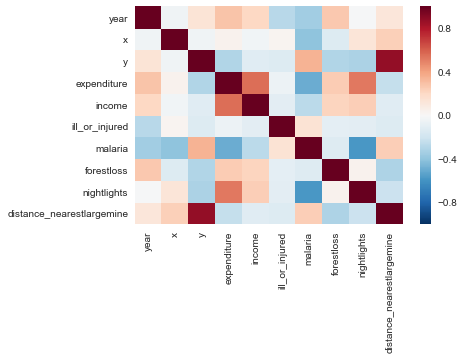

In [4]:
#Correlation Matrix
corrdf = df.corr()
corr = (corrdf)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
# sns.title('Heatmap of Correlation Matrix')
corr

In [5]:
df.columns

Index(['year', 'x', 'y', 'expenditure', 'income', 'ill_or_injured', 'malaria',
       'forestloss', 'nightlights', 'distance_nearestlargemine'],
      dtype='object')

In [6]:
df.isnull().any()

year                          True
x                            False
y                            False
expenditure                   True
income                        True
ill_or_injured                True
malaria                       True
forestloss                    True
nightlights                   True
distance_nearestlargemine    False
dtype: bool

In [7]:
print(df[df["year"].isnull()])
#df.head()

      year        x        y  expenditure  income  ill_or_injured  malaria  \
1590   NaN  0.57982  7.83256          NaN     NaN             NaN      NaN   
1591   NaN  0.63470  6.02610          NaN     NaN             NaN      NaN   
1592   NaN  0.70544  5.84189          NaN     NaN             NaN      NaN   

      forestloss  nightlights  distance_nearestlargemine  
1590         NaN          NaN                 185603.190  
1591         NaN          NaN                  86881.336  
1592         NaN          NaN                 102678.480  


Since these three rows do not contain any economic and health data that we want to combine with small scale mining we drop these rows.

In [8]:
df.describe()

,year,x,y,expenditure,income,ill_or_injured,malaria,forestloss,nightlights,distance_nearestlargemine
count,1590.000000,1593.000000,1593.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1593.000000
mean,1685.407547,-1.113771,7.386736,1144.462657,1618.409123,0.192963,0.414778,0.003691,5.440169,104754.233128
std,718.072947,1.033284,1.894350,863.878698,2776.352511,0.121365,0.117298,0.006236,11.395047,99576.183657
min,98.000000,-3.203450,4.761240,80.285172,-35.787189,0.000000,0.091799,0.000000,0.000000,676.799930
25%,2005.000000,-1.901096,5.942012,547.153865,350.336130,0.101038,0.348880,0.000037,0.046607,26915.229000
50%,2012.000000,-1.012990,6.701314,907.142060,718.863950,0.171429,0.422190,0.000898,0.855386,63871.512000
75%,2013.000000,-0.265932,8.779180,1473.797550,1879.633350,0.267536,0.501839,0.004506,3.596005,175418.700000
max,2013.000000,1.192945,11.127133,7677.353500,61162.129000,0.628571,0.683214,0.072279,60.936462,369073.840000


# Data Exploration and Visualization

Showing Illness and Malaria over time

In [27]:
df = df[df['year']>0]
df2 = df
df2['newyear'] = np.where(df['year']<2000, df['year']+1900, df['year'])
df2 = df2.drop(['year'], axis=1)
df2.head()

,x,y,expenditure,income,ill_or_injured,malaria,forestloss,nightlights,distance_nearestlargemine,newyear
0,-3.05622,6.86144,679.86713,344.251040,0.295238,0.627282,0.0,0.00000,76552.820,1998.0
1,-2.94462,6.35241,545.13544,514.467100,0.297297,0.628550,0.0,0.34153,69400.570,1998.0
2,-2.85447,7.74937,709.71167,511.725740,0.265823,0.603990,0.0,0.00000,47839.813,1998.0
3,-2.81880,10.72420,246.44479,85.705086,0.173913,0.553067,0.0,0.00000,245310.780,1998.0
4,-2.81525,6.88833,1034.02030,826.393370,0.125000,0.620716,0.0,0.00000,49765.992,1998.0


In [28]:
# Add columns that are the logs of income and expenditure
df2 = df2[df2['income']>0]
df2 = df2[df2['expenditure']>0]
df2['logincome'] = np.log(df2['income'])
df2['logexpenditure'] = np.log(df2['expenditure'])
df2.head()

,x,y,expenditure,income,ill_or_injured,malaria,forestloss,nightlights,distance_nearestlargemine,newyear,logincome,logexpenditure
0,-3.05622,6.86144,679.86713,344.251040,0.295238,0.627282,0.0,0.00000,76552.820,1998.0,5.841371,6.521897
1,-2.94462,6.35241,545.13544,514.467100,0.297297,0.628550,0.0,0.34153,69400.570,1998.0,6.243132,6.301034
2,-2.85447,7.74937,709.71167,511.725740,0.265823,0.603990,0.0,0.00000,47839.813,1998.0,6.237789,6.564859
3,-2.81880,10.72420,246.44479,85.705086,0.173913,0.553067,0.0,0.00000,245310.780,1998.0,4.450912,5.507138
4,-2.81525,6.88833,1034.02030,826.393370,0.125000,0.620716,0.0,0.00000,49765.992,1998.0,6.717071,6.941210


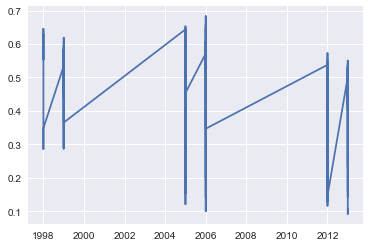

In [30]:
plt.plot(df2["newyear"], df2["malaria"], '-')

In [31]:
df2.head()

,x,y,expenditure,income,ill_or_injured,malaria,forestloss,nightlights,distance_nearestlargemine,newyear,logincome,logexpenditure
0,-3.05622,6.86144,679.86713,344.251040,0.295238,0.627282,0.0,0.00000,76552.820,1998.0,5.841371,6.521897
1,-2.94462,6.35241,545.13544,514.467100,0.297297,0.628550,0.0,0.34153,69400.570,1998.0,6.243132,6.301034
2,-2.85447,7.74937,709.71167,511.725740,0.265823,0.603990,0.0,0.00000,47839.813,1998.0,6.237789,6.564859
3,-2.81880,10.72420,246.44479,85.705086,0.173913,0.553067,0.0,0.00000,245310.780,1998.0,4.450912,5.507138
4,-2.81525,6.88833,1034.02030,826.393370,0.125000,0.620716,0.0,0.00000,49765.992,1998.0,6.717071,6.941210


In [32]:
df2[['newyear','malaria']].groupby(['newyear'], as_index=False).mean().sort_values(by='malaria', ascending=False)
# display as line chart
#plt.plot()

,newyear,malaria
0,1998.0,0.508567
1,1999.0,0.486766
2,2005.0,0.437631
3,2006.0,0.423596
4,2012.0,0.379301
5,2013.0,0.375753


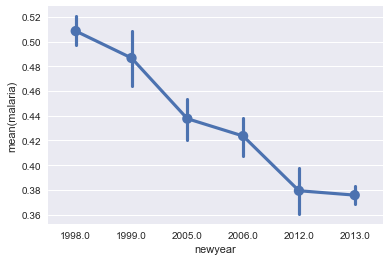

In [33]:
sns.pointplot(x='newyear',y='malaria',data=df2)

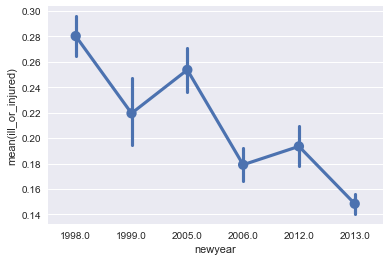

In [34]:
sns.pointplot(x='newyear',y='ill_or_injured',data=df2)

In [35]:
# takes too long
'''
grid = sns.FacetGrid(df2, row='malaria', col='newyear')
grid.map(plt.hist, 'distance_nearestlargemine', bins=4)
grid.add_legend()
'''

"\ngrid = sns.FacetGrid(df2, row='malaria', col='newyear')\ngrid.map(plt.hist, 'distance_nearestlargemine', bins=4)\ngrid.add_legend()\n"

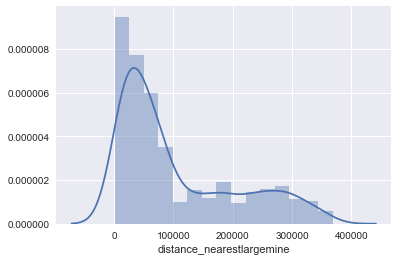

In [43]:
# Histogram
var = 'distance_nearestlargemine' # can also be malaria
sns.distplot(df2[var])

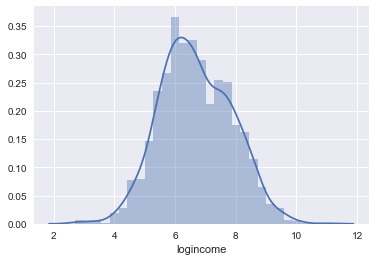

In [44]:
# Histogram of log of income
var = 'logincome'
sns.distplot(df2[var])

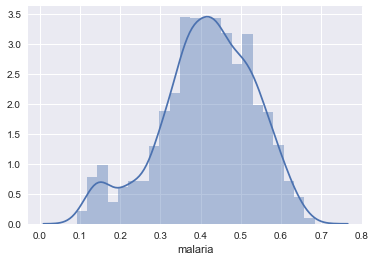

In [49]:
# Histogram of log of income
var = 'malaria'
sns.distplot(df2[var])

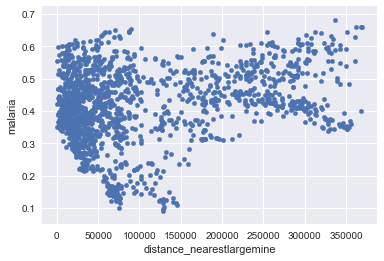

In [50]:
# scatter plot
xvar = 'distance_nearestlargemine'
yvar = 'malaria'
data = pd.concat([df2[yvar], df2[xvar]], axis=1)
data.plot.scatter(x=xvar, y=yvar)

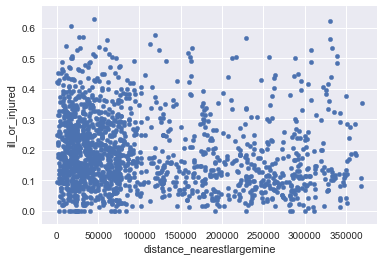

In [51]:
# scatter plot
xvar = 'distance_nearestlargemine'
yvar = 'ill_or_injured'
data = pd.concat([df2[yvar], df2[xvar]], axis=1)
data.plot.scatter(x=xvar, y=yvar)

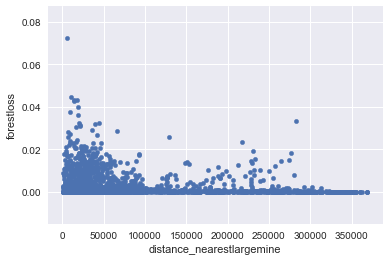

In [52]:
# scatter plot
xvar = 'distance_nearestlargemine'
yvar = 'forestloss'
data = pd.concat([df2[yvar], df2[xvar]], axis=1)
data.plot.scatter(x=xvar, y=yvar)

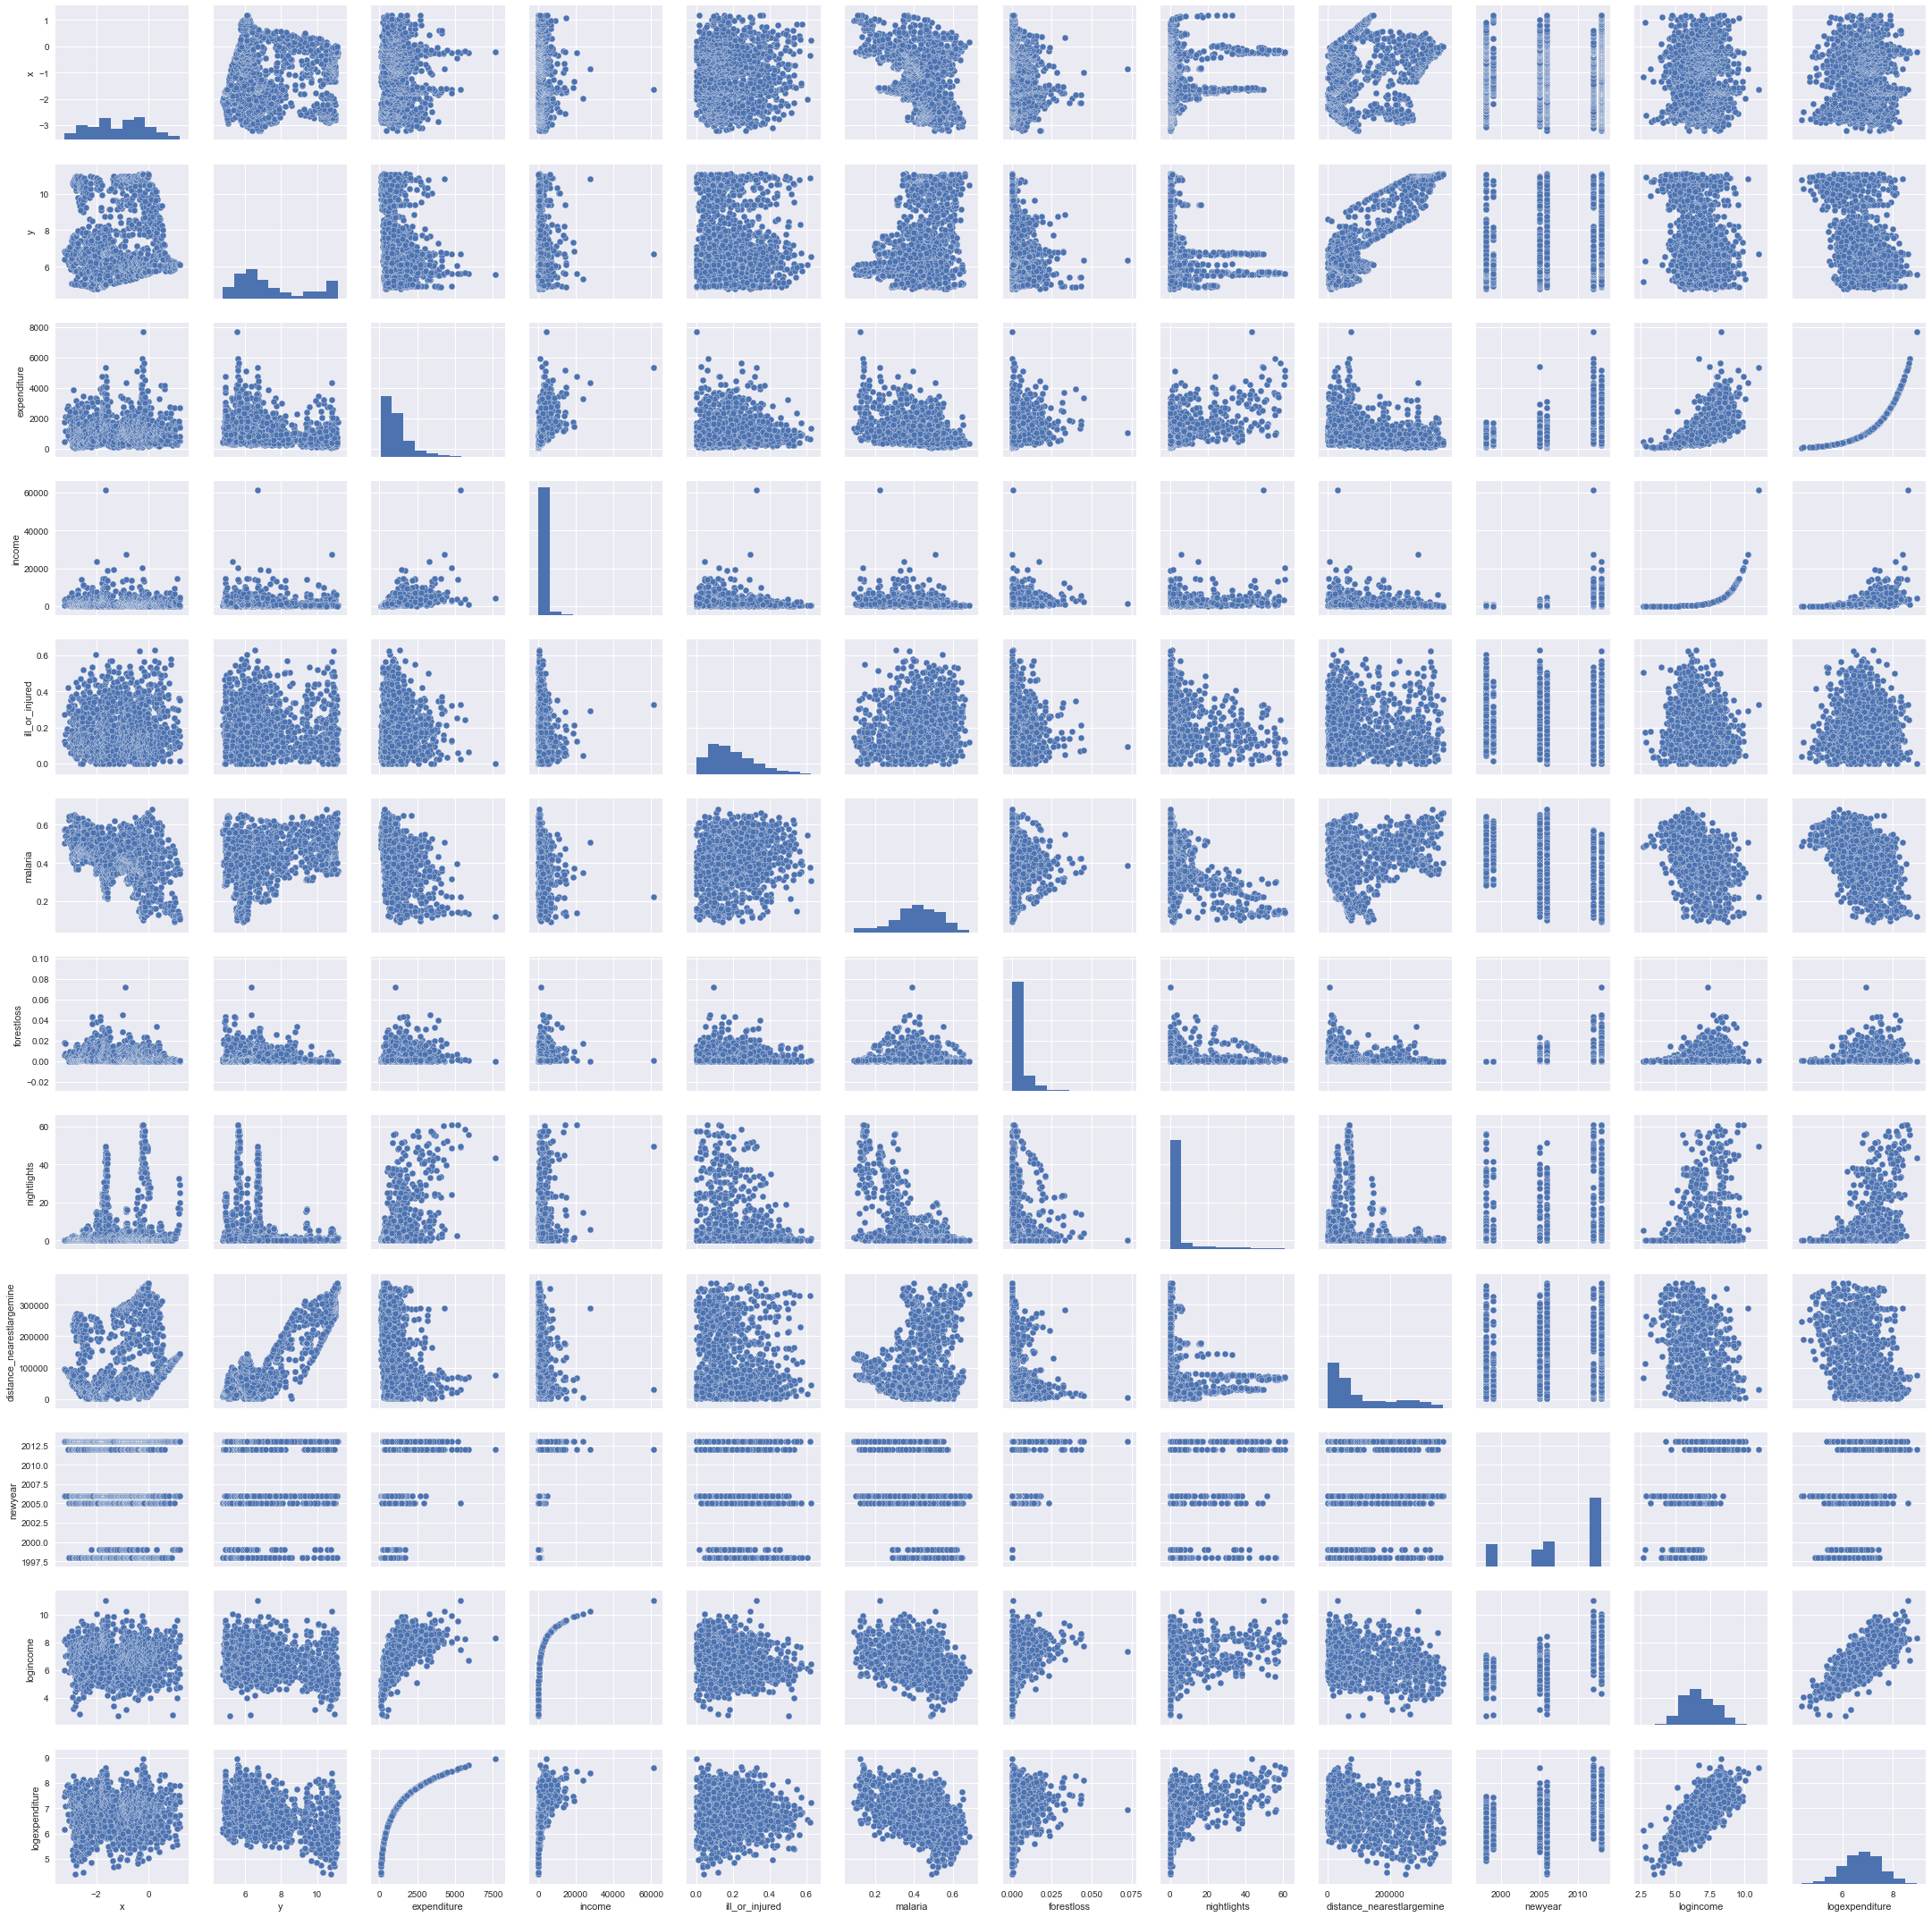

In [54]:
# scatterplot
sns.set()
cols = list(df2)
sns.pairplot(df2[cols], size=2.5)
plt.show()

# Linear Regression

We want to predict the distance of the next mine (large-scale mine at first) based on demographic data.

In [59]:
# With the dataset with small scale mines
# Dataset location
maindb = "short_clust.csv"

# Read in a CSV file and store the contents in a dataframe (df)
smalldf = pd.read_csv(maindb, low_memory=False, sep=',')
smalldf.head()

,year,x,y,expenditure,income,ill_or_injured,malaria,forestloss,nightlights,distance_nearestlargemine,region,distance_igcsmallmine,pid
0,1998,-3.05622,6.86144,679.86713,344.25104,0.295238,0.627282,0.0,0.000000,76552.820,1,61979.7460,110
1,1998,-2.94462,6.35241,545.13544,514.46710,0.297297,0.628550,0.0,0.341530,69400.570,1,27367.5980,116
2,1998,-2.80928,5.03186,496.52213,248.08203,0.191011,0.645785,0.0,1.179558,62704.211,1,65993.9840,101
3,1998,-2.77290,6.44314,564.46698,363.90723,0.285714,0.599508,0.0,0.414835,49295.430,1,7604.1426,93
4,1998,-2.65897,5.87988,534.71375,295.59094,0.363636,0.633003,0.0,0.000000,74638.344,1,15948.2360,91


In [61]:
smalldf = smalldf.drop(['region', 'pid'], axis = 1)

ValueError: labels ['region' 'pid'] not contained in axis

In [63]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


# Use only one feature
Ghana_X = smalldf

# Split the data into training/testing sets
Ghana_X_train = Ghana_X[:-20]
Ghana_X_test = Ghana_X[-20:]

Ghana_X_train = Ghana_X_train.drop(['distance_igcsmallmine'], axis=1)
Ghana_X_test = Ghana_X_test.drop(['distance_igcsmallmine'], axis=1)

print(Ghana_X_train.shape)

# Split the targets into training/testing sets
Ghana_y_train = Ghana_X.distance_igcsmallmine[:-20]
Ghana_y_test = Ghana_X.distance_igcsmallmine[-20:]

print(Ghana_y_train.shape)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(Ghana_X_train, Ghana_y_train)

# Make predictions using the testing set
Ghana_y_pred = regr.predict(Ghana_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Ghana_y_test, Ghana_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Ghana_y_test, Ghana_y_pred))

(1570, 10)
(1570,)
Coefficients: 
 [ -1.38163947e+02   4.32952117e+04   5.54222712e+04   9.91881801e-01
  -5.54932585e-01  -1.91937780e+04  -9.72293728e+04  -1.22081958e+06
  -3.85875024e+02   4.94525113e-01]
Mean squared error: 2167500890.35
Variance score: -0.35


In [68]:
# Plot outputs
'''
plt.scatter(Ghana_X_test, Ghana_y_test,  color='black')

plt.plot(Ghana_X_test, Ghana_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()
'''

"\nplt.scatter(Ghana_X_test, Ghana_y_test,  color='black')\n\nplt.plot(Ghana_X_test, Ghana_y_pred, color='blue', linewidth=3)\n\nplt.xticks(())\nplt.yticks(())\n\nplt.show()\n"

We couldn't find very clear correllating patterns in the data set to help us formulate a hypothesis and train for it. Our approach is to find a hypothesis without looking at the data first. Maybe selectively looking at data from young unemployed men will lead to finding clearer patterns in regards to small scale mines.

# New dataset for new hypothesis

In [23]:
# With the dataset with small scale mines
# Dataset location
dfBig = "glss4_5_6_alignedfclmalnllsm_igc.csv"

# Read in a CSV file and store the contents in a dataframe (df)
bigdf = pd.read_csv(dfBig, low_memory=False, sep=',')
bigdf.head()


,hhid,glss,year,region,clust,nh,pid,sex,mining_region,age,...,distance_nearestmine,nearest_activemine,distance_nearestactivemine,nearest_activemine2010,distance_nearestactivemine2010,tag,_merge_glss_lsm,id_igcsmallmine,distance_igcsmallmine,_merge
0,14.0,4,98.0,1.0,4002,14.0,4.0,2.0,1.0,9.0,...,62704.211,CHICHIWERE,62704.211,IDUAPRIEM /TEBEREBIE,88868.063,0.0,matched (3),92.0,65993.984,matched (3)
1,7.0,4,98.0,1.0,4002,7.0,1.0,1.0,1.0,29.0,...,62704.211,CHICHIWERE,62704.211,IDUAPRIEM /TEBEREBIE,88868.063,0.0,matched (3),92.0,65993.984,matched (3)
2,12.0,4,98.0,1.0,4002,12.0,13.0,1.0,1.0,4.0,...,62704.211,CHICHIWERE,62704.211,IDUAPRIEM /TEBEREBIE,88868.063,0.0,matched (3),92.0,65993.984,matched (3)
3,12.0,4,98.0,1.0,4002,12.0,1.0,1.0,1.0,51.0,...,62704.211,CHICHIWERE,62704.211,IDUAPRIEM /TEBEREBIE,88868.063,0.0,matched (3),92.0,65993.984,matched (3)
4,16.0,4,98.0,1.0,4002,16.0,1.0,2.0,1.0,70.0,...,62704.211,CHICHIWERE,62704.211,IDUAPRIEM /TEBEREBIE,88868.063,0.0,matched (3),92.0,65993.984,matched (3)


In [24]:
df9 = bigdf[["year", "male", "age", "educ_attainment", "school_attendance", "rexpenditurepc", "poor", "rincpc" , "literacy_any", "ill", "unemployed", "x", "y", "distance_nearestmine", "distance_igcsmallmine"]]
df9.shape

(136285, 15)

In [25]:
df9.head()

,year,male,age,educ_attainment,school_attendance,rexpenditurepc,poor,rincpc,literacy_any,ill,unemployed,x,y,distance_nearestmine,distance_igcsmallmine
0,98.0,0.0,9.0,less than primary,1.0,368.25598,1.0,94.246384,0.0,0.0,NaN,-2.80928,5.03186,62704.211,65993.984
1,98.0,1.0,29.0,MSLC/BECE/VOC,0.0,363.77664,1.0,67.633965,1.0,0.0,0.0,-2.80928,5.03186,62704.211,65993.984
2,98.0,1.0,4.0,NaN,NaN,573.92303,1.0,251.470870,NaN,0.0,NaN,-2.80928,5.03186,62704.211,65993.984
3,98.0,1.0,51.0,MSLC/BECE/VOC,0.0,573.92303,1.0,251.470870,1.0,0.0,0.0,-2.80928,5.03186,62704.211,65993.984
4,98.0,0.0,70.0,never in school,0.0,1440.28280,0.0,843.664060,0.0,1.0,NaN,-2.80928,5.03186,62704.211,65993.984


In [26]:
df9.shape

(136285, 15)

In [27]:
df9 = df9[df9["male"] > 0]

In [28]:
df9.shape


(65739, 15)

In [29]:
df9["young"] = (df9["age"] > 14) & (df9["age"] < 30)
df9.head()

,year,male,age,educ_attainment,school_attendance,rexpenditurepc,poor,rincpc,literacy_any,ill,unemployed,x,y,distance_nearestmine,distance_igcsmallmine,young
1,98.0,1.0,29.0,MSLC/BECE/VOC,0.0,363.77664,1.0,67.633965,1.0,0.0,0.0,-2.80928,5.03186,62704.211,65993.984,True
2,98.0,1.0,4.0,NaN,NaN,573.92303,1.0,251.470870,NaN,0.0,NaN,-2.80928,5.03186,62704.211,65993.984,False
3,98.0,1.0,51.0,MSLC/BECE/VOC,0.0,573.92303,1.0,251.470870,1.0,0.0,0.0,-2.80928,5.03186,62704.211,65993.984,False
5,98.0,1.0,42.0,MSLC/BECE/VOC,0.0,1107.00500,0.0,1412.661700,1.0,0.0,0.0,-2.80928,5.03186,62704.211,65993.984,False
6,98.0,1.0,2.0,NaN,NaN,363.77664,1.0,67.633965,NaN,1.0,NaN,-2.80928,5.03186,62704.211,65993.984,False


In [30]:
df9 = df9[df9["young"] == True]

In [31]:
df9.shape

(16962, 16)

In [32]:
df9 = df9.drop(['male', 'age', 'young'], axis=1)
df9.shape

(16962, 13)

In [34]:
df9['educ_attainment'] = pd.Categorical(df9['educ_attainment'])
df9.head()

,year,educ_attainment,school_attendance,rexpenditurepc,poor,rincpc,literacy_any,ill,unemployed,x,y,distance_nearestmine,distance_igcsmallmine,edu
1,98.0,MSLC/BECE/VOC,0.0,363.77664,1.0,67.633965,1.0,0.0,0.0,-2.80928,5.03186,62704.211,65993.984,MSLC/BECE/VOC
10,98.0,less than primary,1.0,252.22647,1.0,27.992922,1.0,0.0,NaN,-2.80928,5.03186,62704.211,65993.984,less than primary
12,98.0,Secondary or higher,0.0,252.22647,1.0,27.992922,1.0,0.0,0.0,-2.80928,5.03186,62704.211,65993.984,Secondary or higher
16,98.0,MSLC/BECE/VOC,0.0,479.94366,0.0,178.144840,1.0,1.0,0.0,-2.80928,5.03186,62704.211,65993.984,MSLC/BECE/VOC
17,98.0,less than primary,1.0,409.70401,0.0,44.485355,0.0,0.0,NaN,-2.80928,5.03186,62704.211,65993.984,less than primary


In [36]:
df9['educode'] = df9.edu.cat.codes
df9.head()

,year,educ_attainment,school_attendance,rexpenditurepc,poor,rincpc,literacy_any,ill,unemployed,x,y,distance_nearestmine,distance_igcsmallmine,edu,educode
1,98.0,MSLC/BECE/VOC,0.0,363.77664,1.0,67.633965,1.0,0.0,0.0,-2.80928,5.03186,62704.211,65993.984,MSLC/BECE/VOC,0
10,98.0,less than primary,1.0,252.22647,1.0,27.992922,1.0,0.0,NaN,-2.80928,5.03186,62704.211,65993.984,less than primary,3
12,98.0,Secondary or higher,0.0,252.22647,1.0,27.992922,1.0,0.0,0.0,-2.80928,5.03186,62704.211,65993.984,Secondary or higher,1
16,98.0,MSLC/BECE/VOC,0.0,479.94366,0.0,178.144840,1.0,1.0,0.0,-2.80928,5.03186,62704.211,65993.984,MSLC/BECE/VOC,0
17,98.0,less than primary,1.0,409.70401,0.0,44.485355,0.0,0.0,NaN,-2.80928,5.03186,62704.211,65993.984,less than primary,3


In [41]:
import csv

edumap = dict(enumerate(df9['edu'].cat.categories) )
#edumap.to_csv('educationmapping.csv')

with open('educationmapping.csv', 'wb') as f:  # Just use 'w' mode in 3.x
    w = csv.DictWriter(f, edumap.keys())
    w.writeheader()
    w.writerow(edumap)

TypeError: a bytes-like object is required, not 'str'

In [12]:
df10 = df9.drop(['educ_attainment', 'school_attendance', 'literacy_any', 'unemployed'], axis=1)

In [20]:
# delete all NaN's
df10 = df10[df10["x"]>0]
df10 = df10[df10["y"]>0]
df10 = df10[df10["ill"]>-0.5]
df10.shape
df10.isnull().any()

year                     False
rexpenditurepc           False
poor                     False
rincpc                   False
ill                      False
x                        False
y                        False
distance_nearestmine     False
distance_igcsmallmine    False
dtype: bool

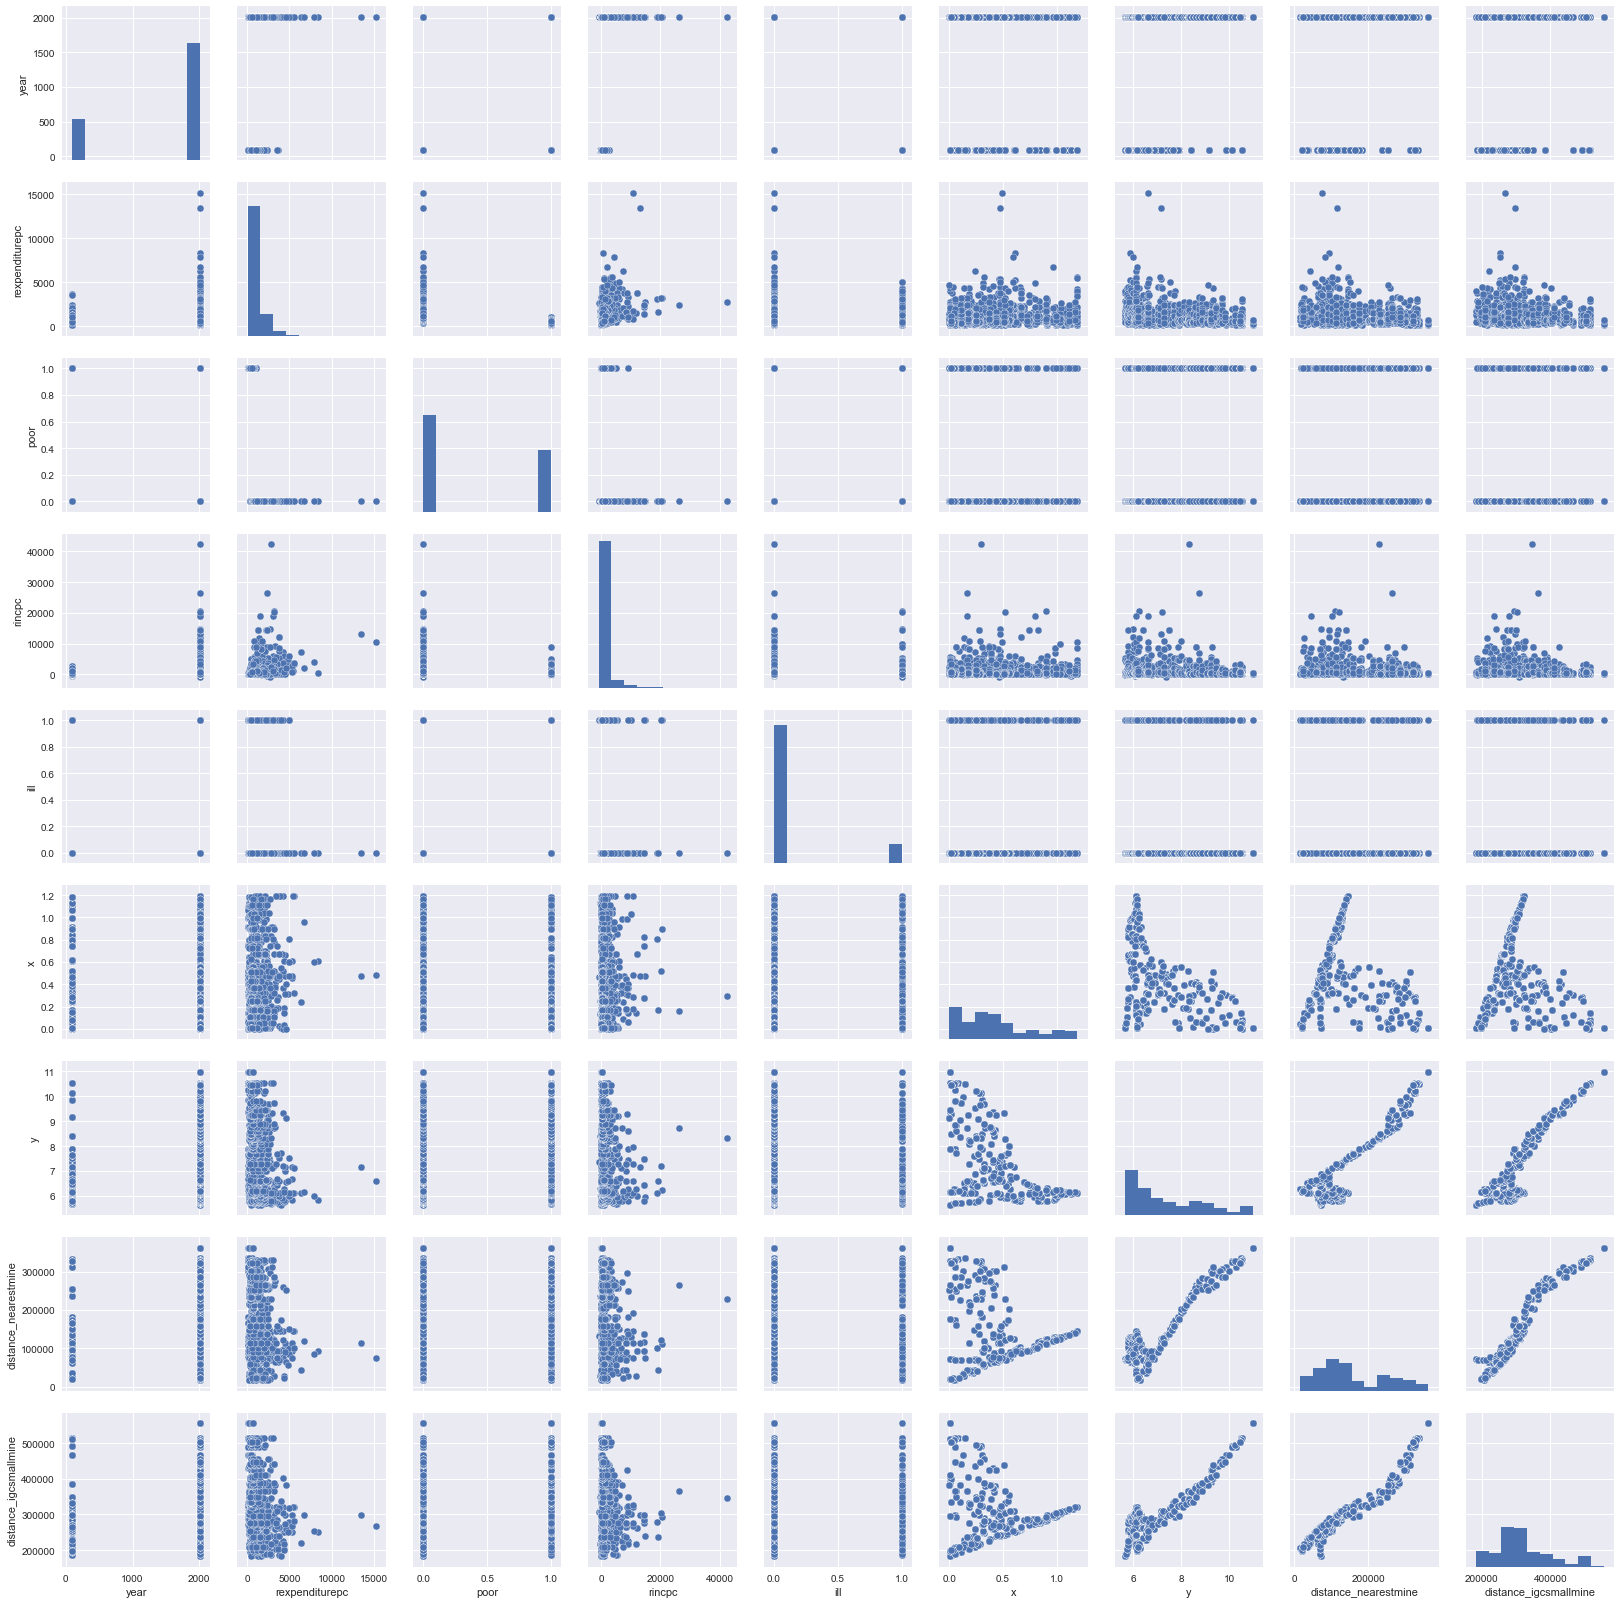

In [21]:
# scatterplot
sns.set()
cols = list(df10)
sns.pairplot(df10[cols], size=2.5)
plt.show()

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


# Use only one feature
Ghana_X = df9

# Split the data into training/testing sets
Ghana_X_train = Ghana_X[:-20]
Ghana_X_test = Ghana_X[-20:]

Ghana_X_train = Ghana_X_train.drop(['distance_nearestlargemine'], axis=1)
Ghana_X_test = Ghana_X_test.drop(['distance_nearestlargemine'], axis=1)

print(Ghana_X_train.shape)

# Split the targets into training/testing sets
Ghana_y_train = Ghana_X.distance_nearestlargemine[:-20]
Ghana_y_test = Ghana_X.distance_nearestlargemine[-20:]

print(Ghana_y_train.shape)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(Ghana_X_train, Ghana_y_train)

# Make predictions using the testing set
Ghana_y_pred = regr.predict(Ghana_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Ghana_y_test, Ghana_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Ghana_y_test, Ghana_y_pred))